In this simulation we are calculating TTT and CCT diagrams for following the cooling behaviour of the Ti6Al4V.
We used two references for work:

The current notebook follows presentation given by A.Malakizadi:

Diploma work No. 42/2010
at Department of Materials and Manufacturing Technology
CHALMERS UNIVERSITY OF TECHNOLOGY
Gotheburg Sweden

and by E.Salsi, M.Chiumenti, and M.Cervera:

Modeling of Microstructure Evolution of Ti6Al4V for additive manufacturing
Metals 2018, 8(8), 633; https://doi.org/10.3390/met8080633

# Constitutive equation and finite element formulation

Heat equation is given here in the general form to model also the phase transformations during the phase transformations of the alloy:

Conservation of the energy is given by the equation:
$$
\rho \frac{\partial E}{\partial t} - \nabla(k\nabla T)= 0
$$
where the E is specific internal energy. $ \rho, k$ and $T,t$ are density, thermal conductivity, temperature and time.
Specific internal energy can also be represented using:
$$
E(t,x)= e(T,X_i)
$$
where $ X_i $ for $i={1,2,3,4}$ are volume fraction for example of the beta, alpha, alpha Windmanstatten and martensite phase.
Differenting the $e(T,X_i)$ with the respect to internal variables:
$$
\frac{\partial e}{\partial T} = c_p \\
\frac{\partial e}{\partial X_i}=-q_i
$$
Thus the general equation is given by:

$$
\rho(T)c_p(T)\frac{\partial T}{\partial t}=\frac{\partial }{\partial x}(k(T)\frac{\partial T}{\partial x}) +
\frac{\partial }{\partial y}(k(T)\frac{\partial T}{\partial y})+\frac{\partial }{\partial z}(k(T)\frac{\partial T}{\partial z})
+\sum{\rho_i(T)q_i(T) \frac{\partial X_i}{\partial t}}
$$

It is important to set also the correct boundary conditions and initial boundary conditions  for the cooling:

Cooling condition for radiation and air convection:
$$
-k\frac{\partial T}{\partial n} = h_c(T) (T-T_{\infty})+\sigma\epsilon(T)(T^{4}-T^{4}_\infty)
$$
If we are cooling by water or quenching:
$$
-k\frac{\partial T}{\partial n} = h_q(T) (T-T_{\infty})
$$
And the start temperature of the sample is given:
$$
T_0 = T(x,y,0)
$$
here the $h_c(T)$ is the convective heat transfer coefficient, $\sigma$ is the Stefan-Boltzmann constant, and $\epsilon $ is radiation emissivity of the surface and $T_\infty$ is the sorounding temperature.
It is possible to reduce the surface radiation to:
$$
\sigma \epsilon(T) (T^4-T^4_\infty)= \sigma \epsilon(T)(T^2+T^2_\infty)(T+T_\infty)(T-T_\infty)=h_r(T)(T-T_\infty)
$$
So combined radiation and convection boundary condition can be expressed by:
$$
-k\frac{\partial T}{\partial n}=h_r(T)(T-T_\infty)+h_c(T) (T-T_{\infty})=h_{rc}(T)(T-T_{\infty})
$$
where $h_{rc}$ is combined heat transfer.  

$$
\rho(T)c_p(T) \frac{\partial T}{\partial t} =k(T)\left( \frac{1}{r}  \frac{\partial }{\partial r}(r\frac{\partial T}{\partial r})+ \frac{\partial^2 T}{\partial z^2}\right)+\sum{\rho_i(T)q_i(T)\frac{\partial X_i}{\partial t}}
$$

## Incoperation of the phase transformation terms

Phase transformation in weak formulation for the phase transformation.
$$
R = \int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\rho_i q_i \frac{\partial X_i}{\partial t} rdrdz}
$$
At constant pressure is the latent heat of transformations are equal to entalphy changes $\rho q_i = \Delta H_i$

$$
R=\int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\Delta H_i \frac{\partial X_i}{\partial t} rdrdz}
$$
Time derivative can be approximated:
$$
\frac{\partial X_i}{\partial t} = \frac{\Delta X_i}{\Delta t}=\frac{X_i^{j+1}-X_i^{j}}{\Delta t}
$$
where $X^{j+1}_i$ is the volume fraction of the phase $i$ at time $j+1$. The thermal properties of the mixture are calculated
using the mixture rule:
$$
\rho c_p = \sum{X_i\rho_i c_{p_i}} \\
k = \sum{X_i k_i}
$$
Both models JMAK and AR model can be used to calculate the amount of the diffusive transformation. We focus now on the JMAK model.


# Scheil principle


The kinetics of the transformation during cooling (anisothermal condition) according to Scheil principle can the approximated by means of infinitesimal time increments $\Delta t$ and ficitious time $t^{*}$ need to gain same fraction of phase $i$ at the current temperature $T_j$

$$
t_j = \Delta t + t_j^{*}
$$
where we can calculate $t^{*}$ from JMAK model as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-X_{i,j-1}})}{k(T_j)}\right]^{1/n(T_j)}
$$
In the case of the remaining beta phase, we should correct $X_{i,j-1}$ with:
$$
F_{i,j-1}=\frac{X_{i,j-1}}{X_{i,j-1}+X_{\gamma,j-1}}
$$
then previous equation is written as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-F_{i,j-1}})}{k(T_j)}\right]^{1/n(T_j)}
$$
So we can calculate then the fictious volume fraction of phase $i$ at time $j$:
$$
F_{i,j}^{*}=1-exp\left(-k(T_j)t_j^{n(T_j)} \right)
$$
The incubation time of the diffusive transformation are calculated using equation:
$$
Q = \int_{0}^{t} \frac{d\epsilon}{\tau_s(T(\epsilon))}= \sum\frac{\Delta t}{\tau_s(T_j)}
$$


## Test case - quenching Ti6Al4V

In [1]:
rho=4250; Cp=600.0; k=25.0; alpha=k/(Cp*rho)

def h(T):
    if (T < (225+273)):
        return 20.0
    elif ( (225+273) < T < (800+273) ):
        return -2.11e-9 * T**4 + 3.78e-6 * T**3 -0.00217*T**2 + 0.555*T-32.47
    else:
        return 92.5
    
    

Assuming that the Jominy test can be treated as the semi-infinite plate. The surface exposed to convective boundary condition exposed on one side, the analytical solution is given as:
$$
\frac{T(x,t)-T_i}{T_{\infty}-T_i}=erfc \left(\frac{x}{2\sqrt{\alpha t}}\right) - exp\left(\frac{h x }{k}+\frac{h^2 \alpha t }{k^2}\right)
erfc\left(\frac{x}{2\sqrt{\alpha t}} + \frac{h\sqrt{\alpha t} }{k}\right)
$$
The temperature distribution of the bar at different position $x$ and time $t$ can be obtained if we know distribution of temperature $T$ at previous time step $t_{i-1}$.

In [2]:
import math
def T(x,t,T):
    return math.erfc(x/(2*math.sqrt(alpha*t)))-math.exp(h(T)*x/k + (h(T)**2 * alpha * t/(k**2))) * math.erfc(x/(2*math.sqrt(alpha*t))+h(T)*math.sqrt(alpha*t)/k)

Here we calculate the temperature drop from the one dimensional solution described in previous cell, we set initial temperature of the bar to $T=1173$ K:

In [3]:
t_initial=900.0+273; t_inf=23.0+273
tr=t_initial
temp=[]
for step in range(1,200):
    a=T(0.0,step,tr)
    tr = a*(t_inf-t_initial)+t_initial
    temp.append(tr)

Plot the given temperature for position $x=0$

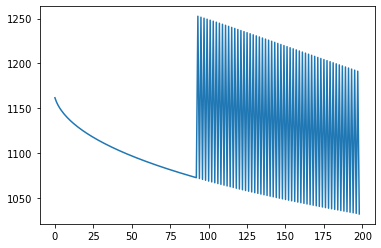

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temp)
plt.show()


# Calculation of heat transfer

In this section we solve general 2d heat equation using fipy library.

In [5]:
from fipy import *
import numpy as np

## Material properties

Here we define the material properties for the Ti6Al4V. The data are taken from the paper "Verification of selective laser melting heat source models with operando X-ray diffraction data".  Data are saved in the text file for reading.

In [6]:
def read_properties():
    # read the text file for different properties
    densityB = np.loadtxt(fname='./densityTi6Al4V.txt', comments='#', delimiter=',', dtype='double')
    densityA = np.loadtxt(fname='./densityTi6Al4V.txt', comments='#', delimiter=',', dtype='double')
    
    conductivityW = np.loadtxt(fname='./conductivityTi6Al4V.txt', comments='#', delimiter=',', dtype='double')
    conductivityB = np.loadtxt(fname='./conductivityTi6Al4V.txt', comments='#', delimiter=',', dtype='double')
    conductivityA = np.loadtxt(fname='./conductivityTi6Al4V.txt', comments='#', delimiter=',', dtype='double')
    
    specificB = np.loadtxt(fname='./specificheatTi6Al4V.txt', comments='#', delimiter=',', dtype='double')
    specificA = np.loadtxt(fname='./specificheatTi6Al4V.txt', comments='#', delimiter=',', dtype='double')
    
    return (densityB,densityA,conductivityW,conductivityB, conductivityA,specificB,specificA)

In [7]:
(dB,dA,cW,cB,cA,sB,sA) = read_properties()

In [8]:
sB

array([[  10.   ,  543.917],
       [ 110.   ,  565.417],
       [ 210.   ,  586.917],
       [ 310.   ,  608.417],
       [ 410.   ,  629.917],
       [ 510.   ,  651.417],
       [ 610.   ,  672.917],
       [ 710.   ,  694.417],
       [ 810.   ,  715.917],
       [ 910.   ,  737.417],
       [1010.   ,  758.917],
       [1110.   ,  780.417],
       [1210.   ,  801.917],
       [1310.   ,  697.825],
       [1410.   ,  715.835],
       [1510.   ,  733.845],
       [1610.   ,  751.855]])

Interpolate the experimental data to get interpolating function:

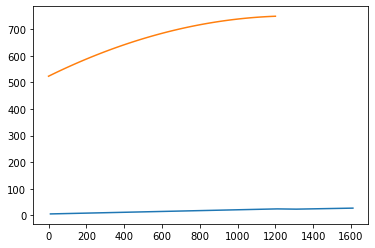

In [9]:
# curve fitting
from scipy.optimize import curve_fit, fsolve, newton
from scipy.interpolate import RectBivariateSpline, CubicSpline
# fit the density function to second order polynomial
def density(x,a,b,c):
     return a*x**2 + b*x + c
def conductivity(x,a,b,c):
    return a*x**2 + b*x + c
def specific_heat(x,a,b,c):
    return a*x**2 + b*x + c
    
#density polynomial for Ti6Al4V phases
densP = [0.]
condM = [0.]
specificM = [0.]

densityP=read_properties()[0]
densP,pcov = curve_fit(density,densityP[:,0],densityP[:,1])
conductivityM = read_properties()[3]
condM,pcov = curve_fit(conductivity,conductivityM[:,0],conductivityM[:,1])
specificMA = read_properties()[6]
specificM,pcov = curve_fit(specific_heat,specificMA[:,0],specificMA[:,1])
def fP(t_):
    return densP[0]*t_**2+ densP[1]*t_ + densP[2]
def cM(t_):
    return condM[0]*t_**2+ condM[1]*t_ + condM[2]
def sM(t_):
    return specificM[0]*t_**2+ specificM[1]*t_ + specificM[2]

plt.plot(conductivityM[:,0],conductivityM[:,1])
w = np.linspace(0,1200,100)
plt.plot(w,sM(w))

We now reading the data for cooling coeficient $h_{rc}$. This coefficient contains both contributions from the radiation and convection heat transfer. The data are taken from "Analysis of temperature and microstructure in Quenching of steel cylinders" by P.R. Woodward, S.R.Chandaseker and H.T.Y. Yang. This data is used for modeling quenching and can used also for Ti6Al4V material.

E:\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


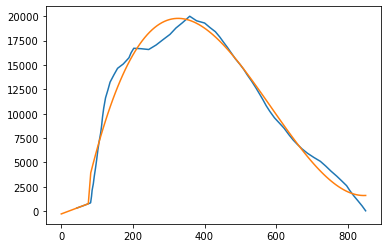

In [10]:
def read_cooling_transfer():
     return np.loadtxt(fname='./cooling1080steel.txt', comments='#', delimiter=',', dtype='double')
def cooling(x,  x0, a,b,c,d,e,f):
    return np.piecewise(x, [x < 82, x >= 82],
                        [lambda x: a*x +b, lambda x: c*x**3+d*x**2+e*x + f])
    
hrcP=[0.]
hrc = read_cooling_transfer()
hrcP,pconv = curve_fit(cooling,hrc[:,0],hrc[:,1])
def hrcf(t_):
      return np.piecewise(t_, [t_ < 82, t_ >= 82],
                        [lambda t_: hrcP[1]*t_ +hrcP[2], lambda t_: hrcP[3]*t_**3+hrcP[4]*t_**2+hrcP[5]*t_ + hrcP[6] ])
        
plt.plot(hrc[:,0],hrc[:,1])
tw = np.linspace(0,850,125)
plt.plot(tw,cooling(tw, *hrcP))

## TTT diagram for Ti6Al4V

In this section we are reading the data from experimental TTT diagram to evaluate the values of the material parameters $k(T_j)$ and $n(T_j)$. Using the previous equations we can calculate the value of $k(T_j)$:
$$
k(T_j)=-ln(1-F_s)/\theta_j^{n(T_j)}
$$
and
$$
n(T_j)=\frac{ln(\frac{ln(1-F_s)}{ln(1-F_e)})}{ln(\frac{\theta_s}{\theta_e})}
$$
where $\theta$ repesents the equivalent transformation time. $F_s$ and $F_e$ are start fraction of the phase and end fraction of the phase, repectively (usually defined $F_s=0.005$ and $F_e=0.995$).

In this code we first read the experimental data to arrays and then fit x and y data with cubic spline. This gives us information for complete temperature range. The values of $k(T_j)$ and $n(T_j)$ are then calculate using the previous equations. The data for TTT-diagram are taken from the paper "Modeling of Microstructure Evolution of Ti6Al4V for additive manufacturing".

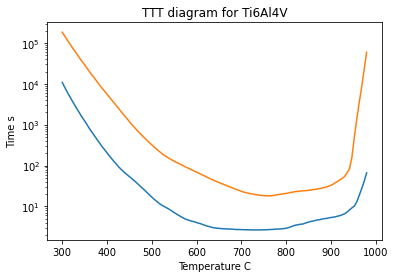

In [11]:
def read_ttt(fendset, fonset):
    endset = np.loadtxt(fname=fendset, comments='#', delimiter=',', dtype='double')
    onset = np.loadtxt(fname=fonset, comments='#', delimiter=',', dtype='double')
    return (onset, endset)


(onset_line, endset_line) = read_ttt( './TTT_Ti6Al4V_Malinov_endset_uniq.txt','./TTT_Ti6Al4V_Malinov_onset_uniq.txt' )

def cubic_interp(onset_line, endset_line):
    # interpolate using the cubic spline
    # the x-coordinate has to be stricly increasing. we are
    # doing interpolation in temperature as this is uniquely defined variable.
    onsetspl = CubicSpline(onset_line[:,1],onset_line[:,0])
    endsetspl = CubicSpline(endset_line[:,1],endset_line[:,0])
    return (onsetspl, endsetspl)
    
onsetspl, endsetspl = cubic_interp(onset_line, endset_line)
#plt.semilogy(pearlite_line[:,1], pearlite_line[:,0])
wt = np.linspace(300,980,125)
figp, axp = plt.subplots()
axp.semilogy(wt, onsetspl(wt))
axp.semilogy(wt, endsetspl(wt))
axp.set_title('TTT diagram for Ti6Al4V')
axp.set_xlabel('Temperature C')
axp.set_ylabel('Time s')

def calcn(Fs, Fe, startspl, endspl, temperature):
    #determine theta for different temperature
    thetas = startspl(temperature)
    thetae = endspl(temperature)
    return np.log(np.log(1-Fs)/np.log(1-Fe))/np.log(thetas/thetae)

n=calcn(0.005,0.995,onsetspl, endsetspl, wt) #test calculations
def calck(Fs,n,startspl, temperature):
    #determine k
    thetas = startspl(temperature)
    return -np.log(1-Fs)/(thetas**n)
    
k=calck(0.005,n,onsetspl,wt) #test calculations

Define some common mesh values for 2D heat flow. We create uniform cylinder mesh on which we solve axisymmetric case.

In [12]:
steps = 100
N = 40
L = 2.5*N/4000
dL = L / N
dt = 0.1
mesh = CylindricalGrid2D(dx = dL, dy = dL, nx = N, ny = N)

Also adds the fraction of different phases as cell variable, so we can calculate the contributions from different phases to heat equation.

In [13]:
alpha = CellVariable(mesh=mesh, name='frac. alpha', hasOld=True, value=0.0)
beta = CellVariable(mesh=mesh, name='frac. beta', hasOld=True, value=1.0)
alphaw = CellVariable(mesh=mesh, name='fract. alphaw',hasOld=True, value=0.1)
temperature = CellVariable(mesh = mesh, name='temperature',value=1173., hasOld=True)
tincubation = CellVariable(mesh = mesh, name='incubation', value=0.1, hasOld=True)
n = CellVariable(mesh = mesh, name='jmak exponent', value=0.)
k = CellVariable(mesh = mesh, name='jmak coeff', value=0.)
(r,z) = mesh.cellCenters()

Initial temperature of the cylinder and surface is set to:
$T_o= 1173K$.
Boundary condition at $y=0$ is given by convection cooling condition:
$$
-k \frac{\partial T}{\partial n} = h_{rc}(T) (T-T_{\infty})
$$

The boundary condition on the $x=0$ left side of the domain is isolated:
$$
-k \frac{\partial T}{\partial n} = 0
$$
The temperature on the top and right side of cylinder are set to surounding temperature:
$T_0 = T_{\infty}$

In [14]:
vh = np.vectorize(h)
#temperature.faceGrad.dot([0,1]).constrain(-vh(temperature.faceValue)*1/k*(temperature.faceValue-t_inf),mesh.facesBottom)
temperature.faceGrad.dot([0,1]).constrain(0,mesh.facesBottom)
temperature.faceGrad.dot([1,0]).constrain(0,mesh.facesLeft)
temperature.constrain(t_inf, mesh.facesRight)
#temperature.constrain(1173., mesh.facesTop)
fluxBottom = hrcf(temperature.faceValue.value)*(temperature.faceValue-t_inf) #changed the default value to exp. measured

## Method of calculation

Description of the algorithm used for the modeling of phase transformations in Ti6Al4V:

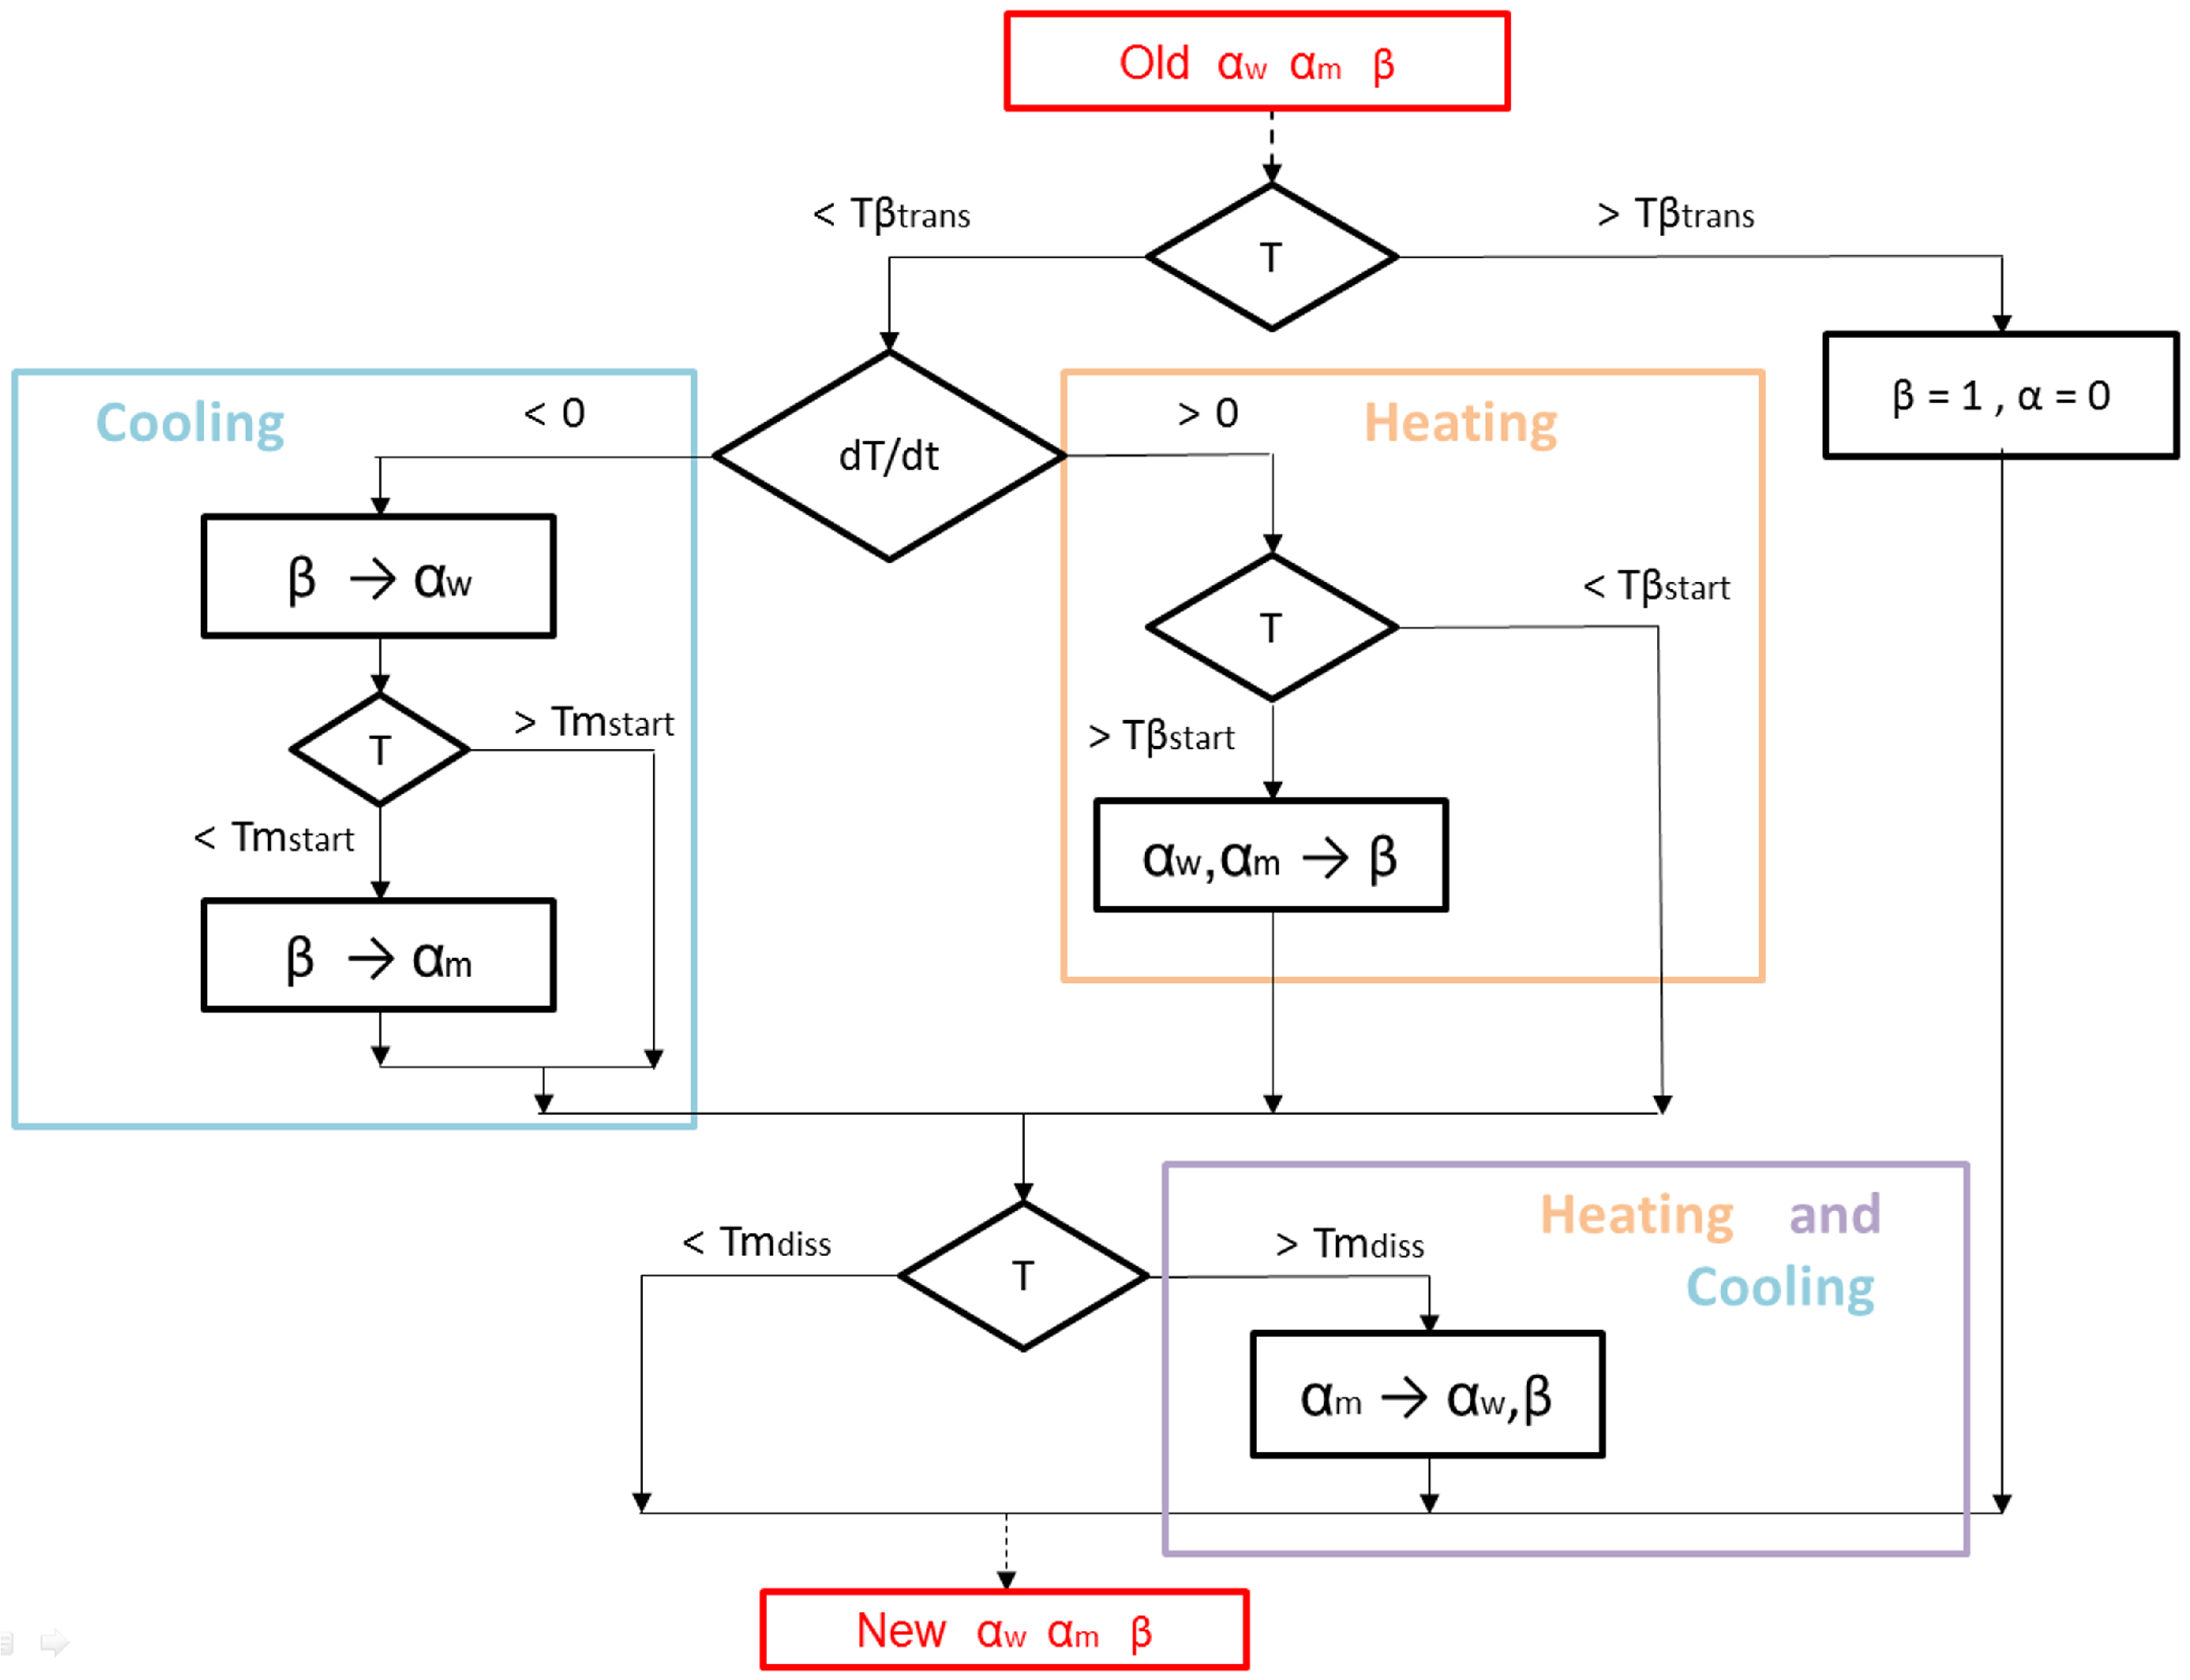

Read $\alpha$ fraction at equilibrium:

Text(0, 0.5, 'Fraction x%')

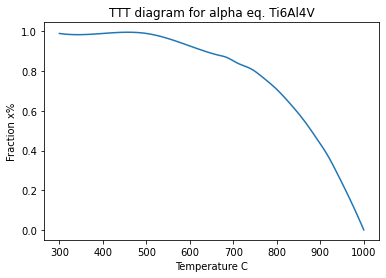

In [15]:
def read_alpha_eq(file):
    alpha = np.loadtxt(fname=file, comments='#', delimiter=',', dtype='double')
    return alpha
alphad = read_alpha_eq('./alpha_fraction.txt')
alphaspl = CubicSpline(np.flipud(alphad[:,0]),np.flipud(alphad[:,1]))
wt = np.linspace(300,1000,125)
figp, axp = plt.subplots()
axp.plot(wt, alphaspl(wt))

axp.set_title('TTT diagram for alpha eq. Ti6Al4V')
axp.set_xlabel('Temperature C')
axp.set_ylabel('Fraction x%')

Calculation of the transformation time (incubation time) before start of diffusive reaction for $\alpha_w$:

In [16]:
def transformation_time(temperature, alphaw, k, n):
    #print("k:{}".format(k))
    #print("n:{}".format(n))
    #print("beta0: {}".format(beta0))
    #print("alphaeq: {}".format(alphaspl(temperature)))
    return (np.log(beta0*alphaspl(temperature)/(beta0*alphaspl(temperature)-alphaw)) / k)**(1./n)
def volume_fraction(temperature, time, k, n):
    #print("k:{}".format(k))
    #print("n:{}".format(n))
    #print("beta0: {}".format(beta0))
    #print("alphaeq: {}".format(alphaspl(temperature)))
    #print("time: {}".format(time))
    alphaw.setValue((1-np.exp(-k*time**n))*beta0*alphaspl(temperature), where= tincubation > 0.)

Formation of the $\alpha_w$ from the beta fraction:
$$
\alpha_w^{n+1} = (1-\exp[-k(\tau^{n+1})^{p(T)}])\beta^{0}\alpha^{eq}
$$
where $k(T)$, $p(T)$ are JMAK parameters:
$$
\tau^n = \left(\frac{1}{k} \ln\frac{\beta^0 \alpha^{eq}} {\beta^{0}\alpha^{eq}-\alpha^n_w}\right)^{1/p(T)}
$$

In [17]:
def transform_beta_to_w(temperature, onset, endset):
    # calculate incubation time
    n = calcn(0.005, 0.995, onset, endset, temperature)
    k = calck(0.005, n, onset, temperature)
    tt = transformation_time(temperature, alphaw, k, n)
    volume_fraction(temperature, tt+dt, k, n) 

## The $\alpha$ to $\beta$
During reheating $\alpha \rightarrow \beta$:
$$
\alpha = \alpha_w+\alpha_m
$$
In this model this transformation is assumed to start at the temperature $T_{\beta start}$. 
$$
\beta^{eq}  = 1 - \alpha^{eq}(T)
$$
Kelly empirical model is used to deal with these transformations:
$$
\beta^{n+1} = F_{dis}(T)(1-\alpha^{eq})(\tau^{n+1})^{0.5}
$$
The model depends on the temperature dependent function $F_{dis}(T)$. 
The fraction at equivalent time $\tau^{n+1} = \tau^n + \Delta t$.
Equivalent time is calculated using the equation:
$$
\tau^n = \left(\frac{\beta^n}{F_{dis}(1-\alpha^{eq}) } \right)^2
$$

Because conservation of mass:
$$
\Delta \alpha = -\Delta \beta = -(\beta^{n+1}-\beta^{n})
$$
which finally gives values for the increments of the alpha phases:
$$
\Delta \alpha_w = -\Delta\beta \frac{\alpha^n_w}{\alpha^n_w+\alpha^n_m} \\
\Delta \alpha_m = -\Delta\beta \frac{\alpha^n_m}{\alpha^n_w+\alpha^n_m}
$$

In [18]:
def transform_alpha_to_beta(temperature, beta, alphaeq):
    # calculate the equivalent time
    tt = (beta/(Fdis(temperature)(1-alphaeq(temperature))))^2
    # return new beta fraction
    betan = Fdis(temperature)*(1-alphaeq(temperature))*sqrt(tt+dt)

For formation of the martensite phase for the fast cooling rates. We are using here Koistinen-Marburger law:
$$
\alpha_m^{n+1}= (1-exp(-k_m(T_{ms}-T))\beta_m^{0}
$$
where $\alpha_m$ represent the fraction of alpha martensite phase. For cooling rates slower than 410 C/s total transformation from $\beta$ to $\alpha$. 
$k_m$ is constant taken from the paper
"Modeling of Microstructure Evolution of Ti6Al4V for additive manufacturing",
Metals 2018.

## Dissolution of $\alpha_m$ in $\alpha_w$ and $\beta$:

Martensite is non-equilibrium phase obtained during fast cooling:
Dissolution happens at temperatures 350-400 C. 
$$
\alpha_m \rightarrow \alpha + \beta
$$
Dissolution fraction is calculated from:
$$
\alpha^{n+1}_{mdiss} = 1 - \exp(-k_{mdiss} (\tau^{n+1})^{p_{mdiss}})
$$

where the $\tau^n$ is calculated using:
$$
\tau^n = \frac{1}{k_{mdiss}} (\ln(1-\alpha^n_{mdiss}))^{1/p_{mdiss}}
$$

JMAK parameters $k_{mdiss}, p_{mdiss}$ are calculated from the TTT-diagram on martensite dissolution.
Experimental data have to be normalized by $\alpha_{mdiss}^{eq}(T)$.
$$
(\alpha^{eq}_{mdiss})^{n+1} \rightarrow \alpha_{mdiss} = 
\alpha_{mdiss} \left(\alpha^{eq}_{mdiss}\right)^n
/ \left( \alpha_{mdiss}^{eq} \right)^{n+1}
$$
$$
\Delta \alpha_m = -\Delta \alpha_{mdiss}\alpha_m^0*\alpha_{mdiss}^{eq}
$$
Differences in the $\Delta\alpha_{mdiss}$:
$$
\Delta \alpha_m = \Delta\alpha_{mdiss}^{n+1}-\Delta\alpha_{mdiss}^n
$$
$\alpha_{mdiss}^0$ is initial martensite fraction.

The equilibrium $\beta$ is given by:
$$
\beta^{eq} = 1-\alpha^{eq}
$$

$$
\Delta\alpha_w = \alpha^{eq}\Delta\alpha_m
$$
$$
\Delta\beta = (1-\alpha^{eq})\Delta\alpha_m
$$


Text(0, 0.5, 'Time s')

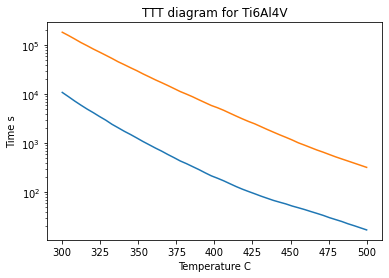

In [19]:
## dissolution of the martensite
(onset_line, endset_line) = read_ttt( './TTT_martensite_diss_onset.txt','./TTT_martensite_diss_endset.txt' )
cubic_interp(onset_line, endset_line)
wt = np.linspace(300,500,50)
figp, axp = plt.subplots()
axp.semilogy(wt, onsetspl(wt))
axp.semilogy(wt, endsetspl(wt))
axp.set_title('TTT diagram for Ti6Al4V')
axp.set_xlabel('Temperature C')
axp.set_ylabel('Time s')

Volume fraction of dissolution is calculated using the standard JMAK model:

In [20]:
def volume_fraction_diss(time,k,n):
    fp.setValue((1-np.exp(-k*time**n)), where= tincubation > 1.)

In [21]:
def dissolution(temperature, beta, alpha):
    # calculate incubation time
    pdiss = calcn(0.005, 0.995, onset_diss, endset_diss, temperature)
    kdiss = calck(0.005, pdiss, onset_diss, temperature)
    
    ## calculate the equivalent time for dissolution
    tt = 1./kdiss * (np.log(1-alpha))^(1/pdiss)
    volume_fraction_diss(tt+dt,kdiss,pdiss) 

In [22]:
km = 1.10E-2 # coeficient for the Koistinen-Marburger equation.
Tm= 230+273     # martensitic start temperature for alpha martensite
def koistinen_marburger(temperature):
    fi.setValue((1.0-np.exp(-km*(Tm-temperature))*betam), where= Tm-temperature > 0)
    #fi.setValue( (1.0-(np.exp(-alpha*Tm)*(1+alpha*temperature+0.5*(alpha*temperature)**2+1./6*(alpha*temperature)**3)))*(1.0-fp), where=Tm-temperature > 0)

Define the source term for the phase transformation effects. The phase transformation source contains the fraction of the austinite phase transformed in martensite and enthalpy of the formation.

In [23]:
deltaHm = 640e+6  # martensite enthalpy
deltaHp = 1.56e+9 + 1.5e+6*temperature # pearlite enthalpy
#deltaHm=0.
#def phaseSourceT():
#    return deltaHm*(fi-fi.old)/dt
def phaseSourceT():
    return TransientTerm(var=fi,coeff=deltaHm)+TransientTerm(var=fp,coeff=deltaHp)

Now setup the temperature equation for source term comming from the phase transformations defined the flag phaseTrans.
Here we added also same flux from the right side of the cylinder, assuming that the cooling liquid is also hitting the right side of cylinder.

temperatureEq = TransientTerm(coeff=rho*Cp,var=temperature)== DiffusionTerm(coeff=cM(temperature),var=temperature)+ \
(mesh.facesBottom*fluxBottom).divergence+phaseSourceT()

if __name__ == '__main__':
    temperatureViewer = Viewer(vars=temperature,figaspect=1,datamin=0,datamax=1200)

This is only test for simple continous cooling rates:

In [24]:
beta0 = beta.copy()
tsteps = 100
coolrate = 120./60.
dt = 1
ltalpha = []
while temperature.value[1] > 300:
    temperature = temperature - coolrate
    if (temperature.value[1] > 300 and temperature.value[1] < 980):
        transform_beta_to_w(temperature, onsetspl, endsetspl)
        print("alpha w",alphaw.value[1])
        ltalpha.append(alphaw.value[1])
        

alpha w 0.10000040584541424
alpha w 0.10000241872571049
alpha w 0.10000749733901589
alpha w 0.1000173119807591
alpha w 0.1000343324242117
alpha w 0.10006337996609758
alpha w 0.10010738050075238
alpha w 0.10018117793814896
alpha w 0.10029207912055811
alpha w 0.10045619942779153
alpha w 0.10071050605175645
alpha w 0.10108126174517652
alpha w 0.1016159731863317
alpha w 0.10244814067708621
alpha w 0.10366269209492265
alpha w 0.10552876265759165
alpha w 0.10862770569653835
alpha w 0.11280953873879188
alpha w 0.11853094603384699
alpha w 0.1255781973745899
alpha w 0.13367882804818654
alpha w 0.1428578610518502
alpha w 0.1532018076861616
alpha w 0.1646362966234983
alpha w 0.17708085245611396
alpha w 0.19015005804233825
alpha w 0.20407407396008287
alpha w 0.21871710882541207
alpha w 0.23395424459712946
alpha w 0.2497247863334216
alpha w 0.26582762293988016
alpha w 0.2820188872461222
alpha w 0.2985156639747659
alpha w 0.3146295488712568
alpha w 0.3307349629321456
alpha w 0.3461022244659635
alpha

alpha w 0.9825793086786062
alpha w 0.9825813376992724
alpha w 0.9825831243705504
alpha w 0.9825846924436761
alpha w 0.9825860498740865
alpha w 0.9825872255942802
alpha w 0.9825882548083443
alpha w 0.9825891546885045
alpha w 0.9825899470897249
alpha w 0.9825906509912398
alpha w 0.982591265659322
alpha w 0.9825918285927275
alpha w 0.9825923363330052
alpha w 0.9825928050550701
alpha w 0.9825932430718647
alpha w 0.9825936536923183
alpha w 0.9825940561072208
alpha w 0.9825944516621524
alpha w 0.9825948366148592
alpha w 0.9825952277603971
alpha w 0.9825956222283193
alpha w 0.9825960239911502
alpha w 0.982596434936998
alpha w 0.9825968523250613
alpha w 0.9825972816256279
alpha w 0.9825977203597805
alpha w 0.9825981684854299
alpha w 0.982598631060327
alpha w 0.9825990961430741
alpha w 0.9825995709512126
alpha w 0.9826000520123849
alpha w 0.9826005373436587
alpha w 0.982601030902024
alpha w 0.9826015285372803
alpha w 0.9826020243605795


In [25]:
temperature.value[1]

299.0

Text(0.5, 0, 'Time s')

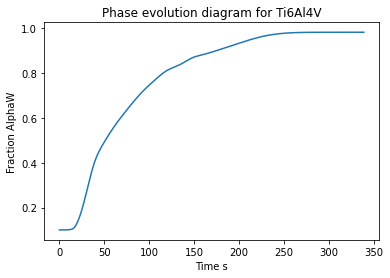

In [26]:
figp, axp = plt.subplots()
axp.plot(ltalpha)

axp.set_title('Phase evolution diagram for Ti6Al4V')
axp.set_ylabel('Fraction AlphaW')
axp.set_xlabel('Time s')

We step the solution in time, plotting as we go interactively

In [27]:
import fipy.solvers.pyAMG as solvers
#import fipy.solvers.pysparse as solvers
import numpy as np
solver = solvers.linearGMRESSolver.LinearGMRESSolver(precon=None, iterations=1500, tolerance=1e-15) 
poisson= solvers.linearLUSolver.LinearLUSolver()

steps = 3000 # number of steps to calculate
eps =1e-5
Tvstime = [] # temperature values during cooling

for i in range(steps):
    terr=10e+10
    
    # test if the temperature is greater than beta temperature
    if (temperature > Tbeta):
        continue
        
    # test if we are cooling 
    if (temperature.old - temperature > 0):
        # transform beta in widmastaten alpha
        transform_beta_to_w(temperature, onset, endset)
        if Tm < temperature:
            # update martensite fraction using koistinen-marburger eq.
            koistinen_marburger(temperature)
            
        # dissolution of the martensite
        if temperature > Tmdiss:
            dissolution(temperature, beta, alpha)
    # test if we are heating
    elif (temperature.old - temperature < 0):
        if (temperature > TbetaS):
             transform_alpha_to_beta(temperature, beta, alphaeq)
                
        # dissolution of the martensite
        if (temperature > Tmdiss):
            dissolution(temperature, beta, alpha)
            
            
        
    # calculate incubation time
    #n = calcn(0.005,0.995,austenitespl, pearlitespl, temperature)
    #k = calck(0.005,n,austenitespl,temperature)
    #print ("n = {} and k = {}".format(n,k))
    #tt = transformation_time(fp,k,n)
    #tincubation.setValue(tincubation.value + dt/austenitespl(temperature))
    print (tincubation)
    # calculate volume fraction of the pearlite phase
    # the reaction start when incubation time reaches 1.0
    #volume_fraction(tt+dt,k,n) 
        
    
    # update complete volume fraction
    xi = fp + fi
    print (max(xi))
    while(terr > eps):
        print ("Residual: {}".format(terr))
        terr = temperatureEq.sweep(temperature, dt=dt,solver=poisson)
    
    #print min(phaseSourceT())
    if __name__ == '__main__':
        path = "../../TEST/temperature/"
        temperatureViewer.plot(path+"temperatureOH"+str(i)+".eps")  
        np.savetxt(path+"temperatureOH"+str(i),temperature)
        np.savetxt(path+"martensiteOH"+str(i),fi)
        np.savetxt(path+"pearliteOH"+str(i),fp)
        Tvstime.append(temperature.value[0])
        print ("step: ", i, "Min. temperature",min(temperature), "Max. temperature", max(temperature))
        

NameError: name 'Tbeta' is not defined

# Visualize the results

In [ ]:
fig1, (axp2, axc2)= plt.subplots(2, 1, sharex=False, sharey=False, figsize=(14,10))

viewer1 = MultiViewer(viewers = (Matplotlib2DGridViewer(vars=fi, title='$martensite$', axes=axp2, \
                                                       datamin=0., datamax=1.), \
                                Matplotlib2DGridViewer(vars=fp,  title='$pearlite$'   , axes=axc2, \
                                                       datamin=0., datamax=1.)))


In [ ]:
plt.plot(tempload.reshape(N,N)[:,20])

In [ ]:
%matplotlib inline
temperatureViewer.plot(path + "temperature100.png")

Plotting the value of the temperature in the middle of the cylinder at the convection surface.

In [ ]:
t=[]
t1=[]
for i in range(1,540,5):
    load = np.loadtxt(path+"temperatureOH"+str(i))
    t.append(load.reshape(N,N)[5,1])
    t1.append(load.reshape(N,N)[20,20])
fig, ax = plt.subplots()
ax.plot(t)
ax.plot(t1)
ax.set(title='Temperature',ylabel='Temperature K',xlabel='timesteps')

Plot of the temperature at central point of the cylinder. The temperature rises on the point and then drops again due to enthalphy of austinite to martensite phase transformation. Is this numerical instability??

In [ ]:
plta = plt.plot(Tvstime)

### Martensite and pearlite amounts

In [ ]:
fig2, (axp22, axc22)= plt.subplots(2, 1, sharex=False, sharey=False, figsize=(14,10))

axp22.plot(fi.value.reshape(N,N)[2,:], 'r')
axp22.plot(fp.value.reshape(N,N)[2,:], 'b')
axp22.set_xlabel('Radius')
axp22.set_ylabel('Amount of phase %')
axp22.set_title('Amount of pearlite (blue) and martensite (red) phases')

axc22.plot(fi.value.reshape(N,N)[:,20], 'r')
axc22.plot(fp.value.reshape(N,N)[:,20], 'b')
axc22.set_xlabel('Height')
axc22.set_ylabel('Amount of phase %')
axc22.set_title('Amount of pearlite (blue) and martensite (red) phases')